***

<font color='green'>

# Project Solution: Supervised Learning
### Filename: Bank_Personal_Loan.csv
### File consists of data for 5000 customers including their demographic info, relationship with bank, response to last personal loan campaign (whether offered personal loan was accepted or not)
### Purpose: Build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This would increase the success ratio and reduce the cost of the campaign.  
***
***
*Prepared by: Sauvik De*

*Date: July 28, 2020*
    
</font>

***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from IPython.display import display_html, display, HTML

In [2]:
# Read Thera bank's customer level data as dataframe and store it into a variable called 'customer'
# Note: The datafile 'Bank_Personal_Loan.csv' is stored under the same folder as that of this ipynb notebook
customer = pd.read_csv('Bank_Personal_Loan.csv', sep=',', header=0)

### Exploratory Data Analysis

In [3]:
print(f'The shape of the dataframe is {customer.shape}')
print('\nFirst few rows of the dataframe:')
customer.head()

The shape of the dataframe is (5000, 14)

First few rows of the dataframe:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Check columns and their datatypes
print("\nThere don't seem to be any missing values and all the columns in the provided raw dataframe are either integer or float.\n")
customer.info()


There don't seem to be any missing values and all the columns in the provided raw dataframe are either integer or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<font color='green'>

#### A more detailed look at each attribute of the dataframe ...
- **ID**: Customer ID
- **Age**: Customer's age in completed years
- **Experience**: # years of professional experience
- **Income**: Annual income of the customer in thousands of dollars
- **ZIPCode**: Home Address ZIP code.
- **Family**: Family size of the customer
- **CCAvg**: Avg. spending on credit cards per month in thousands of dollars
- **Education**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- **Mortgage**: Value of house mortgage, if any, in thousands of dollars
- **Securities Account**: Does the customer have a securities account with the bank?
- **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
- **Online**: Does the customer use internet banking facilities?
- **CreditCard**: Does the customer use a credit card issued by UniversalBank?
- **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?
<font>

In [5]:
print(f"\nThere are {customer['ID'].nunique()} unique customer IDs in our dataset.")
print("\nFrequency distribution of the ordered Customer ID difference:")
print(customer['ID'].sort_values().diff().value_counts())
print(f"\nThe sequence of the customer IDs is equidistant across the full dataset and hence nothing unusual in terms discontinuity or missing customer records. Thus we can safely remove 'ID' column from our dataset as it is not helpful to predict customer's loan purchasing potential.")

print("\nUnique values/levels of the following 'categorical' attributes:")
print(f"*Education*: {customer['Education'].unique()}")
print(f"*Securities Account*: {customer['Securities Account'].unique()}")
print(f"*CD Account*: {customer['CD Account'].unique()}")
print(f"*Online*: {customer['Online'].unique()}")
print(f"*CreditCard*: {customer['CreditCard'].unique()}")
print(f"*Personal Loan*: {customer['Personal Loan'].unique()}")
print(f"*ZIP Code*: {customer['ZIP Code'].nunique()}")

print("\nFew findings about the nature of the attributes in the dataset:")
print("1) Variables 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage' are numerical.")
print("2) Variable 'Education' is ordered categorical with three levels.")
print("3) Variables 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan' are nominal binary categorical.")
print("4) Variable 'ZIPCode' doesn't bear any significance as a number itself; however, we can try bucketizing it in a meaningful way before using it for further analysis.")
print("Note: Looking up the ZIP Codes in the website make me feel these are all ZIP codes from the western part of USA.")


There are 5000 unique customer IDs in our dataset.

Frequency distribution of the ordered Customer ID difference:
1.0    4999
Name: ID, dtype: int64

The sequence of the customer IDs is equidistant across the full dataset and hence nothing unusual in terms discontinuity or missing customer records. Thus we can safely remove 'ID' column from our dataset as it is not helpful to predict customer's loan purchasing potential.

Unique values/levels of the following 'categorical' attributes:
*Education*: [1 2 3]
*Securities Account*: [1 0]
*CD Account*: [0 1]
*Online*: [0 1]
*CreditCard*: [0 1]
*Personal Loan*: [0 1]
*ZIP Code*: 467

Few findings about the nature of the attributes in the dataset:
1) Variables 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage' are numerical.
2) Variable 'Education' is ordered categorical with three levels.
3) Variables 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan' are nominal binary categorical.
4) Variable 'ZIPCode' do


Looking at the univariate distribution of the numerical attributes in the dataset:
1) Both the variables, 'Age' and 'Experience', look to have a very similar symmetric shape of distribution having multiple modes over a range of values. Somewhat surprisingly, variable 'Experience' has 52 negative values out of 5000 records. The multi-modality of the distribution suggests presence of various age-groups and accordingly various experience-groups. No apparent outliers could be found. Median values for Age and Experience are at 45 and 20 respectively.

2) Variables 'Income', 'CCAvg' and 'Mortgage' are right-skewed.
	a) As expected, income is more concentrated towards smaller values with average annual income of $74000.0 being higher than median annual income of $64000.0; while Q1 and Q3 of annual income being $39000.0 and $98000.0 respectively.
	b) Monthly average expenditure on credit card is more concentrated towards smaller values with average of $1938.0 being higher than median of $1500

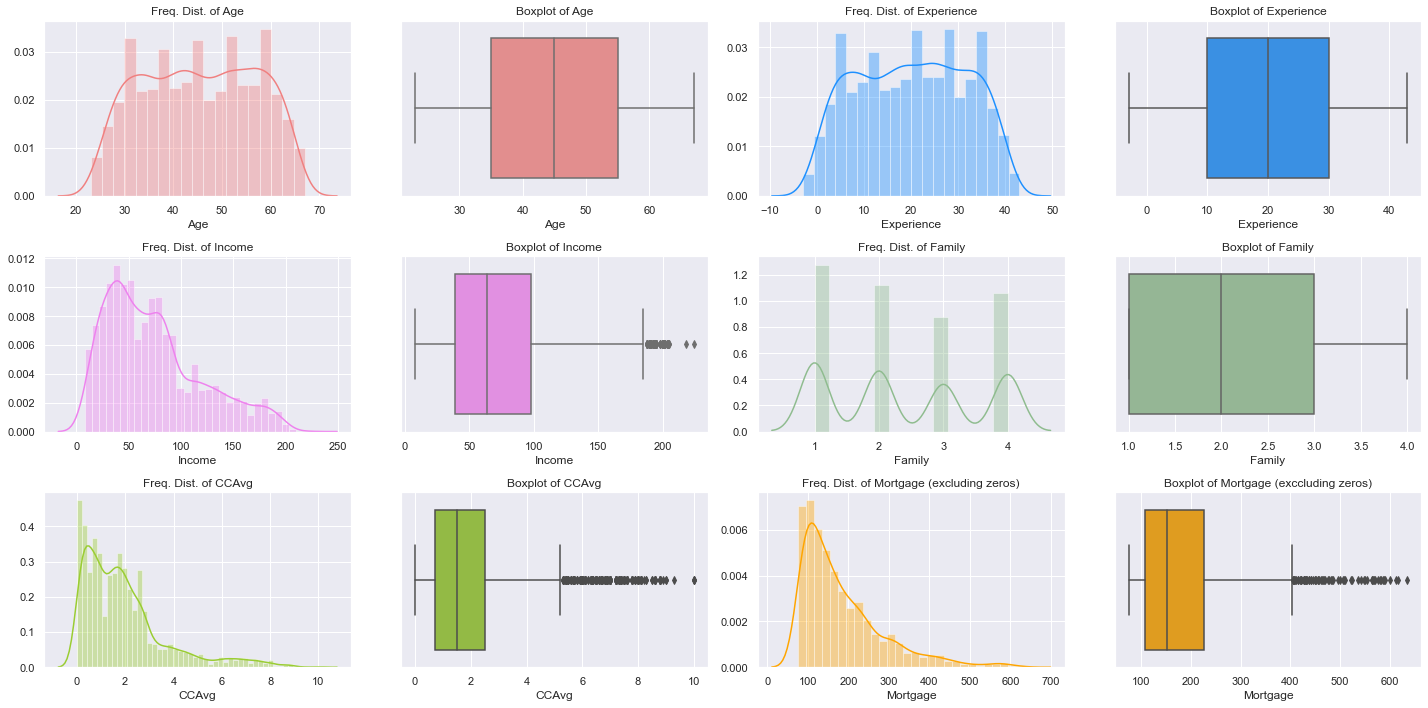

In [6]:
# Let's look at the distribution of each of the attributes in the dataset
# starting with numerical variables first ...

sns.set()
fig, ax = plt.subplots(3, 4, figsize=(40,25))
plt.gcf().set_size_inches(20, 10)
sns.distplot(customer['Age'], color='lightcoral', ax=ax[0,0]).set_title('Freq. Dist. of Age')
sns.boxplot(customer['Age'], color = 'lightcoral', ax=ax[0,1]).set_title('Boxplot of Age')
sns.distplot(customer['Experience'], color='dodgerblue', ax=ax[0,2]).set_title('Freq. Dist. of Experience')
sns.boxplot(customer['Experience'], color='dodgerblue', ax=ax[0,3]).set_title('Boxplot of Experience')
sns.distplot(customer['Income'], color='violet', ax=ax[1,0]).set_title('Freq. Dist. of Income')
sns.boxplot(customer['Income'], color='violet', ax=ax[1,1]).set_title('Boxplot of Income')
sns.distplot(customer['Family'], color='darkseagreen', ax=ax[1,2]).set_title('Freq. Dist. of Family')
sns.boxplot(customer['Family'], color='darkseagreen', ax=ax[1,3]).set_title('Boxplot of Family')
sns.distplot(customer['CCAvg'], color='yellowgreen', ax=ax[2,0]).set_title('Freq. Dist. of CCAvg')
sns.boxplot(customer['CCAvg'], color='yellowgreen', ax=ax[2,1]).set_title('Boxplot of CCAvg')
sns.distplot(customer[customer['Mortgage']!=0]['Mortgage'], color='orange', ax=ax[2,2]).set_title('Freq. Dist. of Mortgage (excluding zeros)')
sns.boxplot(customer[customer['Mortgage']!=0]['Mortgage'], color='orange', ax=ax[2,3]).set_title('Boxplot of Mortgage (exccluding zeros)')
plt.tight_layout()

uwCCAvg = customer['CCAvg'].quantile(q=0.75) + stats.iqr(customer['CCAvg'])*1.5
olCntCCAvg = (customer['CCAvg'] > uwCCAvg).sum()
uwMortgage = customer[customer['Mortgage']!=0]['Mortgage'].quantile(q=0.75) + stats.iqr(customer[customer['Mortgage']!=0]['Mortgage'])*1.5
olCntMortgage = (customer[customer['Mortgage']!=0]['Mortgage'] > uwMortgage).sum()

print("\nLooking at the univariate distribution of the numerical attributes in the dataset:")
print(f"1) Both the variables, 'Age' and 'Experience', look to have a very similar symmetric shape of distribution\
 having multiple modes over a range of values.\
 Somewhat surprisingly, variable 'Experience' has {(customer['Experience']<0).sum()} negative values out of {customer.shape[0]} records.\
 The multi-modality of the distribution suggests presence of various age-groups and accordingly various experience-groups.\
 No apparent outliers could be found. Median values for Age and Experience are at 45 and 20 respectively.")
print("\n2) Variables 'Income', 'CCAvg' and 'Mortgage' are right-skewed.")
print(f"\ta) As expected, income is more concentrated towards smaller values with average annual income of\
 ${customer['Income'].mean().round(0)*1000} being higher than median annual income of ${customer['Income'].median().round(0)*1000};\
 while Q1 and Q3 of annual income being ${np.quantile(a=customer['Income'],q=0.25).round(0)*1000}\
 and ${np.quantile(a=customer['Income'],q=0.75).round(0)*1000} respectively.")
print(f"\tb) Monthly average expenditure on credit card is more concentrated towards smaller values with\
 average of ${(customer['CCAvg'].mean()*1000).round(0)} being higher than median of\
 ${(customer['CCAvg'].median()*1000).round(0)}. Q1 and Q3 of monthly avg. credit card spends are\
 ${(np.quantile(a=customer['CCAvg'],q=0.25)*1000).round(0)} and ${(np.quantile(a=customer['CCAvg'],q=0.75)*1000).round(0)} respectively.\
 The maximum monthly average expenditure on credit card is ${(customer['CCAvg'].max()*1000).round(0)}.\
 Notably the upper whisker (UW) point is ${uwCCAvg*1000:.0f}.\
 The number of customers with monthly credit card spends above UW is {olCntCCAvg}.")
print(f"\tc) Housing mortgage is heavily concentrated at $0, i.e., ~{(customer['Mortgage']==0).sum() / customer.shape[0]:.0%}\
 of customers with no mortgage in our dataset. Below distribution and box-plots are shown for the non-zero mortgages.\
 Still the distribution of non-zero mortgages is right-skewed with average\
 ${customer[customer['Mortgage']!=0]['Mortgage'].mean()*1000:.0f} higher than\
 median ${customer[customer['Mortgage']!=0]['Mortgage'].median()*1000:.0f};\
 while Q1 and Q3 values being ${customer[customer['Mortgage']!=0]['Mortgage'].quantile(q=0.25)*1000:.0f}\
 and ${customer[customer['Mortgage']!=0]['Mortgage'].quantile(q=0.75)*1000:.0f} respectively.\
 The maximum mortgage is ${customer[customer['Mortgage']!=0]['Mortgage'].max()*1000:.0f}.\
 Notably the upper whisker (UW) point is ${uwMortgage*1000:.0f}.\
 The number of customers with mortgages above UW is {olCntMortgage}.")
print(f"\n3) Variable 'Family' is a discrete variable taking on values 1,2,3 and 4.\
 Mostly the customers are from single-member family; while there are customers from 2-, 4- and 3-member families\
 in decreasing order of frequencies.")


Looking at the distribution of numerical variables in bivariate way:
1) Typically *Age* and *Experience* are not very different between the cohorts of customers accepting loan offer and those not.
2) It is clearly evident that customers accepting personal loan offer are having higher *Income* vs customers not accepting the same.
3) Also, customers accepting personal loan offer do have higher average monthly spends on credit card vs customers not accepting the same.
4) About 31% of customers have mortgage; so typically it is seen that customers availing loan offer have higher mortgages vs customers not availing the same.

Note: These comments are from EDA perspective; We can't draw any causal inference though.


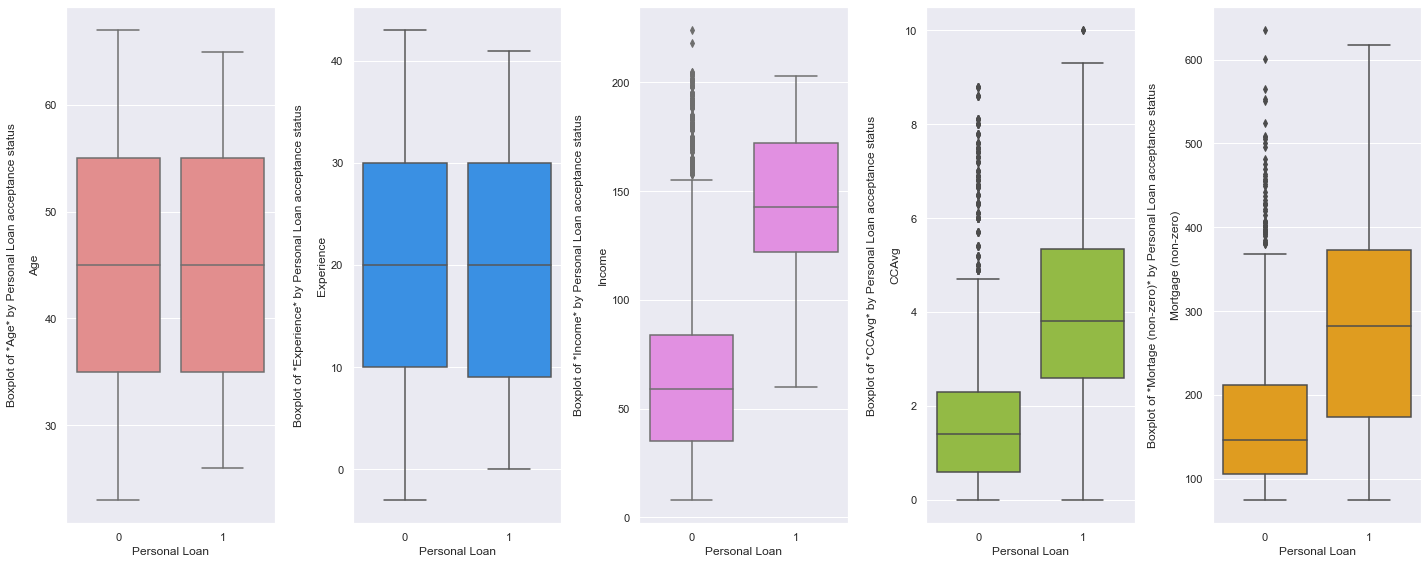

In [7]:
# A quick look at the distribution of the numerical variables (bivariate-way) ...
# Personal Loan being the binary target variable, we can look at the distribution of other (numerical) variables within loan buckets

sns.set()
fig, ax = plt.subplots(1, 5, figsize=(20,12))
plt.gcf().set_size_inches(20, 8)
sns.boxplot(x=customer['Personal Loan'], y=customer['Age'], color = 'lightcoral', ax=ax[0])
ax[0].set_ylabel('Boxplot of *Age* by Personal Loan acceptance status\n\nAge')
sns.boxplot(x=customer['Personal Loan'], y=customer['Experience'], color='dodgerblue', ax=ax[1])
ax[1].set_ylabel('Boxplot of *Experience* by Personal Loan acceptance status\n\nExperience')
sns.boxplot(x=customer['Personal Loan'], y=customer['Income'], color='violet', ax=ax[2])
ax[2].set_ylabel('Boxplot of *Income* by Personal Loan acceptance status\n\nIncome')
sns.boxplot(x=customer['Personal Loan'], y=customer['CCAvg'], color='yellowgreen', ax=ax[3])
ax[3].set_ylabel('Boxplot of *CCAvg* by Personal Loan acceptance status\n\nCCAvg')
sns.boxplot(x=customer['Personal Loan'], y=customer[customer['Mortgage']!=0]['Mortgage'], color='orange', ax=ax[4])
ax[4].set_ylabel('Boxplot of *Mortage (non-zero)* by Personal Loan acceptance status\n\nMortgage (non-zero)')
plt.tight_layout()

print("\nLooking at the distribution of numerical variables in bivariate way:")
print("1) Typically *Age* and *Experience* are not very different between the cohorts of customers accepting loan offer and those not.")
print("2) It is clearly evident that customers accepting personal loan offer are having higher *Income* vs customers not accepting the same.")
print("3) Also, customers accepting personal loan offer do have higher average monthly spends on credit card vs customers not accepting the same.")
print("4) About 31% of customers have mortgage; so typically it is seen that customers availing loan offer have higher mortgages vs customers not availing the same.")
print("\nNote: These comments are from EDA perspective; We can't draw any causal inference though.")


Looking at the univariate distribution of the categorical variables:
1) Majority of the customers are undergrads; while graduate and advanced/professional level customers are very similar in count.
2) Most of the customers (~89.6%) don't have securities account.
3) Similarly, most of the customers (~94.0%) don't have deposit account.
4) ~59.7% customers in our sample avail netbanking facility.
5) ~70.6% customers don't use credit card issued by Universal Bank.

Distriburtion of the target column *Personal Loan*:
~9.6% customers accepted offer of personal loan.
Since our goal is to predict the likelihood of customer's accepting personal loan offer, 'Personal Loan' is response variable here; and looking at only 9.6% of acceptance rate in the given sample, dataset seems class-imbalanced. So the ratio is almost 1:9 in favor of class 0. Thus model's ability to predict class 0 (i.e., probability of customer's loan non-acceptance) will be better than predicting class 1 (i.e, probability of c

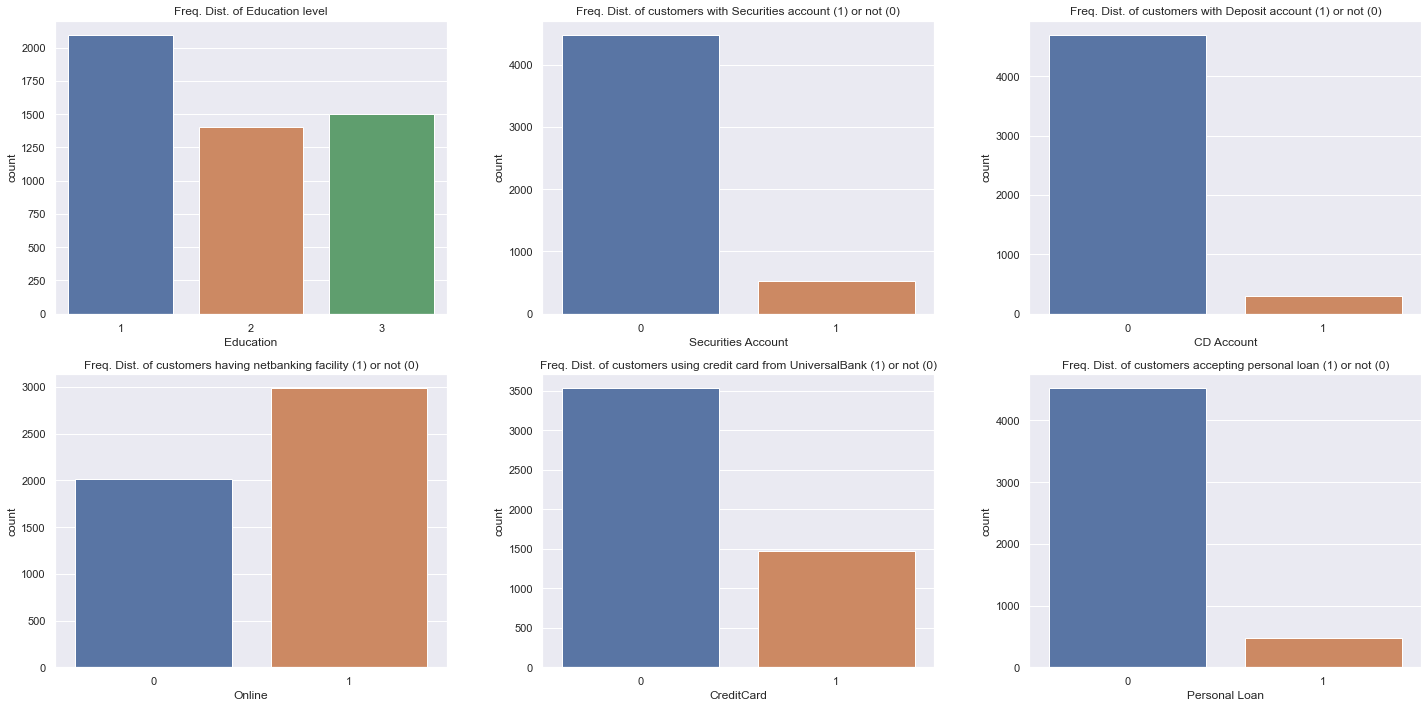

In [8]:
# Next looking at the distribution of the categorical variables (univariate-way) .. 
# .. including the target variable, *Personal Loan*

sns.set()
fig, ax = plt.subplots(2, 3, figsize=(30,15))
plt.gcf().set_size_inches(20, 10)
sns.countplot('Education', data=customer, ax=ax[0,0]).set_title('Freq. Dist. of Education level')
sns.countplot('Securities Account', data=customer, ax=ax[0,1]).set_title('Freq. Dist. of customers with Securities account (1) or not (0)')
sns.countplot('CD Account', data=customer, ax=ax[0,2]).set_title('Freq. Dist. of customers with Deposit account (1) or not (0)')
sns.countplot('Online', data=customer, ax=ax[1,0]).set_title('Freq. Dist. of customers having netbanking facility (1) or not (0)')
sns.countplot('CreditCard', data=customer, ax=ax[1,1]).set_title('Freq. Dist. of customers using credit card from UniversalBank (1) or not (0)')
sns.countplot('Personal Loan', data=customer, ax=ax[1,2]).set_title('Freq. Dist. of customers accepting personal loan (1) or not (0)')
plt.tight_layout()

print("\nLooking at the univariate distribution of the categorical variables:")
print("1) Majority of the customers are undergrads; while graduate and advanced/professional level customers are very similar in count.")
print(f"2) Most of the customers (~{(customer['Securities Account']==0).sum() / customer.shape[0]:.1%}) don't have securities account.")
print(f"3) Similarly, most of the customers (~{(customer['CD Account']==0).sum() / customer.shape[0]:.1%}) don't have deposit account.")
print(f"4) ~{(customer['Online']==1).sum() / customer.shape[0]:.1%} customers in our sample avail netbanking facility.")
print(f"5) ~{(customer['CreditCard']==0).sum() / customer.shape[0]:.1%} customers don't use credit card issued by Universal Bank.")
print("\nDistriburtion of the target column *Personal Loan*:")
print(f"~{(customer['Personal Loan']==1).sum() / customer.shape[0]:.1%} customers accepted offer of personal loan.")
print("Since our goal is to predict the likelihood of customer's accepting personal loan offer,\
 'Personal Loan' is response variable here; and looking at only 9.6% of acceptance rate in the given sample,\
 dataset seems class-imbalanced. So the ratio is almost 1:9 in favor of class 0. Thus model's ability to predict class 0\
 (i.e., probability of customer's loan non-acceptance) will be better than predicting class 1 (i.e, probability of customer's loan acceptance).")
print('\n')


Looking at the categorical variables in bi-variate way:
1) Customers with higher education level tend to have more loan acceptance rate.
2) Cusotmers having securities account tend to have marginally higher rate of accepting personal loan offer.
3) Having deposit account seems like an important factor for customer's acceptance of personal loan. Customers with deposit account does indeed have a significantly higher rate of accepting loan offer vs customers without deposit account.
4) Proportion of customers accepting loan offer doesn't seem to vary between those with and those without netbanking facility. Thus variable 'Online' may not be have any significant effect on customer's decision of acceptance of personal loan.
5) Similarly, customer's decision to accept loan offer doesn't seem to get affected by customer's usage of credit card.
6) Typically customers having bigger family size tend to accept personal loan offers more; In particular, customers with family size of 3 and 4 typica

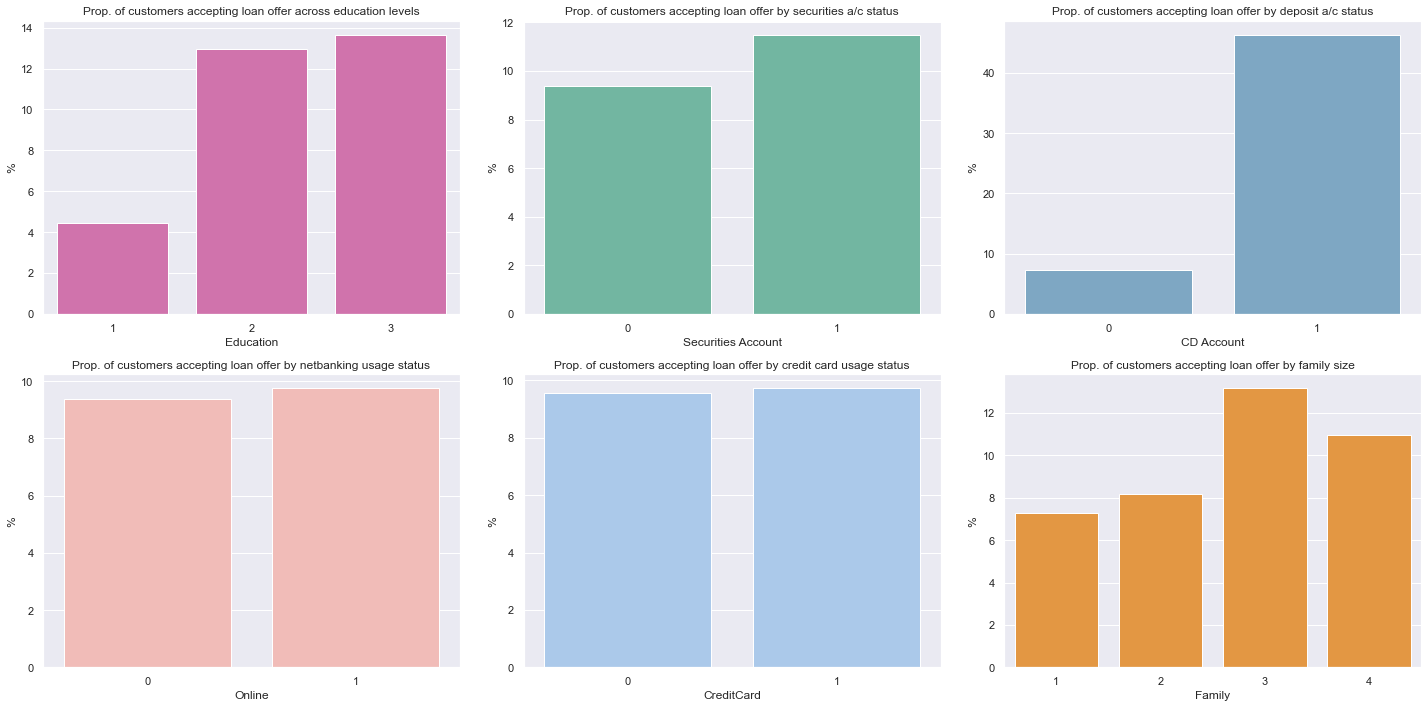

In [9]:
# A quick look at the distribution of the categorical variables (bivariate-way) ...
# Personal Loan being the target variable, we can use hue to look at the distribution of loan conditional on other (categorical) variables

fig, ax = plt.subplots(2, 3, figsize=(25,10))
plt.gcf().set_size_inches(20, 10)

tmp = customer.groupby('Education')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='Education', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette="PuRd", ax=ax[0,0]).set_title('Prop. of customers accepting loan offer across education levels')
ax[0,0].get_legend().remove()

tmp = customer.groupby('Securities Account')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='Securities Account', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette='Set2', ax=ax[0,1]).set_title('Prop. of customers accepting loan offer by securities a/c status')
ax[0,1].get_legend().remove()

tmp = customer.groupby('CD Account')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='CD Account', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette='PuBu', ax=ax[0,2]).set_title('Prop. of customers accepting loan offer by deposit a/c status')
ax[0,2].get_legend().remove()

tmp = customer.groupby('Online')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='Online', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette='Pastel1', ax=ax[1,0]).set_title('Prop. of customers accepting loan offer by netbanking usage status')
ax[1,0].get_legend().remove()

tmp = customer.groupby('CreditCard')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='CreditCard', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette='pastel6', ax=ax[1,1]).set_title('Prop. of customers accepting loan offer by credit card usage status')
ax[1,1].get_legend().remove()

tmp = customer.groupby('Family')['Personal Loan'].value_counts(normalize=True).mul(100).rename('%').reset_index()
_ = sns.barplot(x='Family', y='%', hue='Personal Loan', data=tmp[tmp['Personal Loan']==1], palette='YlOrBr', ax=ax[1,2]).set_title('Prop. of customers accepting loan offer by family size')
ax[1,2].get_legend().remove()

plt.tight_layout()

print("\nLooking at the categorical variables in bi-variate way:")
print("1) Customers with higher education level tend to have more loan acceptance rate.")
print("2) Cusotmers having securities account tend to have marginally higher rate of accepting personal loan offer.")
print("3) Having deposit account seems like an important factor for customer's acceptance of personal loan. Customers with deposit account does indeed have a significantly higher rate of accepting loan offer vs customers without deposit account.")
print("4) Proportion of customers accepting loan offer doesn't seem to vary between those with and those without netbanking facility. Thus variable 'Online' may not be have any significant effect on customer's decision of acceptance of personal loan.")
print("5) Similarly, customer's decision to accept loan offer doesn't seem to get affected by customer's usage of credit card.")
print("6) Typically customers having bigger family size tend to accept personal loan offers more; In particular, customers with family size of 3 and 4 typically have the top two loan acceptance rates; while single-member customers have the lowest rate of loan acceptance.")


A few quick insights from the pairplot:
1) Interestingly, 'Age' and 'Experience' clearly seem to be almost perfectly linearly related and hence we will not include both these variables at the same time.
2) Like we found earlier, typically customers accepting personal loan offer have higher income.
3) Higher average monthly credit card balance and higher mortgage are more associated with customers having higher income.
4) Also, customers accepting personal loan offer have typically higher average monthly credit card balance.


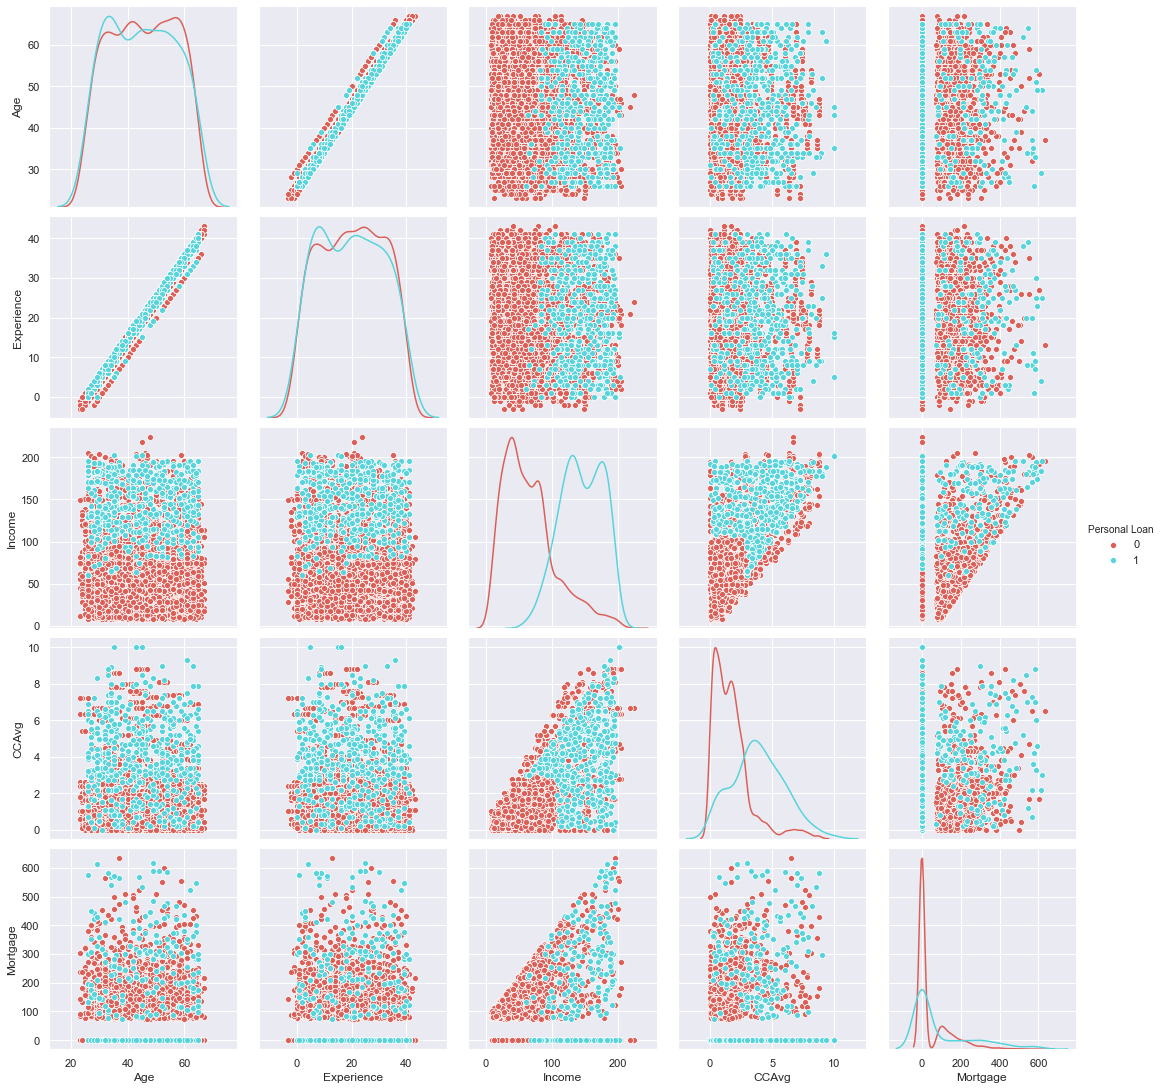

In [10]:
# As a part of EDA, I also wanted to have a quick look at the pairplot of the numerical columns to understand
# the relationship between the pairs of predictor variables
sns.set()
_ = sns.pairplot(data=customer[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']], hue='Personal Loan',\
                 height=3, palette='hls', plot_kws={'edgecolor':'white'}, diag_kws={'shade':False})

print("\nA few quick insights from the pairplot:")
print("1) Interestingly, 'Age' and 'Experience' clearly seem to be almost perfectly linearly related and\
 hence we will not include both these variables at the same time.")
print("2) Like we found earlier, typically customers accepting personal loan offer have higher income.")
print("3) Higher average monthly credit card balance and higher mortgage are more associated with customers having higher income.")
print("4) Also, customers accepting personal loan offer have typically higher average monthly credit card balance.")


Measure of similarity (proportion of concordant pairs) between pairs of binary categorical variables:
('Personal Loan', 'Securities Account') : 0.8236
('Personal Loan', 'CD Account') : 0.8996
('Personal Loan', 'Online') : 0.4236
('Personal Loan', 'CreditCard') : 0.6672
('Securities Account', 'CD Account') : 0.894
('Securities Account', 'Online') : 0.4272
('Securities Account', 'CreditCard') : 0.6588
('CD Account', 'Online') : 0.456
('CD Account', 'CreditCard') : 0.7416
('Online', 'CreditCard') : 0.462

Correlation matrix of the numerical attributes:


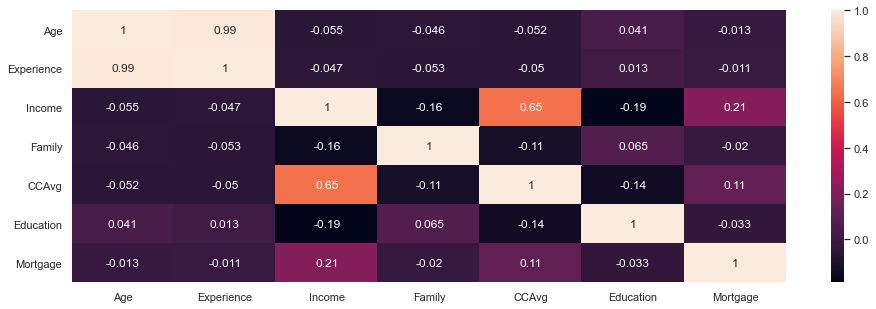

In [11]:
# Let's look at the correlation heatmap to understand the bi-variate relationship between pairs of variables numerically

# measure of similarity between the pairs of categorical attributes
catVars = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
print('\nMeasure of similarity (proportion of concordant pairs) between pairs of binary categorical variables:')
for p in combinations(catVars, 2):
    print(p, ":", np.diag(pd.crosstab(customer[p[0]], customer[p[1]])).sum() / customer.shape[0])
    
# correlation matrix of numerical attributes
numVars = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
print('\nCorrelation matrix of the numerical attributes:')
plt.figure(figsize=(16,5))
_ = sns.heatmap(customer[numVars].corr(), annot=True)

### Feature Engineering

In [12]:
# Let's do some cleaning up / feature engineering before we feed the data into ML models
# 1) Remove Customer ID column to start with ...
customer.drop(columns='ID', axis=1, inplace=True)

In [13]:
# 2) Since 'Age' is almost perfectly linearly related to 'Experience' (0.99 correlation!!)
# And, given that 'Experience' does have negative values for quite a few records (52 out of 5000),
# I would prefer retaining 'Age' variable - so drop 'Experience' variable
customer.drop(columns='Experience', axis=1, inplace=True)

In [14]:
# 3) Let's look at *ZIP Code* variable now ...
print("\nZIP code digit count check:")
print("Except one instance, all the ZIP codes are of 5-digit.")
z = pd.DataFrame(customer['ZIP Code'].apply(lambda s: len(str(s))).value_counts().reset_index())
z.columns = ['Digit_count', 'Frequency']
print(z)
print("\nThe only 4-digit ZIP code is", customer['ZIP Code'][customer['ZIP Code'].apply(lambda s: len(str(s))==4)].iloc[0])
print("I will consider this code as having only first four digits of the ZIP code available in our data.")
print("\nThe count of unique ZIP codes is", customer['ZIP Code'].astype(str).nunique())
print("\nIn order to make use of ZIP codes in our prediction of probability of customer's purchasing the loan, we can simply use this variable through one-hot-encoding transformation.")
print("However, this will create 467 additional feature columns of binary values (high-cardinality attribute case) making the feature space huge.")
print("\nOn another thought, since ZIP code is hiererchical in nature, we may also want to take first three digits (state+region level in USA) and then apply one-hot-encoding to it.")
print(f"\nThere are {customer['ZIP Code'].apply(lambda s: str(s)[0:3]).nunique()} unique values based on the first three digits of ZIP codes in our sample.")


ZIP code digit count check:
Except one instance, all the ZIP codes are of 5-digit.
   Digit_count  Frequency
0            5       4999
1            4          1

The only 4-digit ZIP code is 9307
I will consider this code as having only first four digits of the ZIP code available in our data.

The count of unique ZIP codes is 467

In order to make use of ZIP codes in our prediction of probability of customer's purchasing the loan, we can simply use this variable through one-hot-encoding transformation.
However, this will create 467 additional feature columns of binary values (high-cardinality attribute case) making the feature space huge.

On another thought, since ZIP code is hiererchical in nature, we may also want to take first three digits (state+region level in USA) and then apply one-hot-encoding to it.

There are 57 unique values based on the first three digits of ZIP codes in our sample.


<font color='green'>

**ZIP Code** as a number doesn't say much - but we can encode this in a meaningful way to make it usable into the model

Since it may be considered as a nominal categorical variable, we can try the following strategies:

- One-Hot-Encoding (keeping only the high-frequency (say covering about 80% of records) categories, and rests considering as a new 'rare' category)
- Frequency-encoding
- Impact-encoding
- Weight-of-Evidence encoding (this approach involves the response for encoding)

    [Note there are many categories at 5-digit level, so I restrict our encoding strategy at 3-digit ZIP code level to avoid possible overfitting]
<font>

In [15]:
customer['ZIP'] = customer['ZIP Code'].apply(lambda s: str(s)[0:3])
z = pd.DataFrame(customer['ZIP'].value_counts().sort_values(ascending=False)).reset_index()
z.columns = ['ZIP','Frequency']
z['Cum_Freq_Prop'] = round(100*z['Frequency'].cumsum() / z['Frequency'].sum(), 2)

print("\nEven at a higher level (3-digit ZIP), few ZIP codes are having very low frequency...")
df1_styler = z.head(10).style.set_table_attributes("style='display:inline'").set_caption('10 most frequent ZIP codes')
df2_styler = z.tail(10).style.set_table_attributes("style='display:inline'").set_caption('10 Least frequent ZIP codes')
display_html(df1_styler._repr_html_()+'\xa0\xa0\xa0\xa0'+df2_styler._repr_html_(), raw=True)

zHighFreq = z[z['Cum_Freq_Prop'] <= 80]['ZIP']
print(f"\nMoreover, {len(zHighFreq)} most frequent ZIP codes out of {len(z)} unique ZIP codes account for 80% of total observations.")
print(f"So I plan to use One-Hot-Encoding applied on {len(zHighFreq)} most frequent ZIP codes and the rests into 'rare' category.")


Even at a higher level (3-digit ZIP), few ZIP codes are having very low frequency...


,ZIP,Frequency,Cum_Freq_Prop
0,900,375,7.5
1,921,279,13.08
2,950,267,18.42
3,945,264,23.7
4,941,257,28.84
5,943,257,33.98
6,947,251,39
7,920,248,43.96
8,940,242,48.8
9,913,222,53.24



Moreover, 20 most frequent ZIP codes out of 57 unique ZIP codes account for 80% of total observations.
So I plan to use One-Hot-Encoding applied on 20 most frequent ZIP codes and the rests into 'rare' category.


Looking at the plot, there is no 'clear' evidence that ZIP code may matter for prediction of customer's acceptance of personal loan.


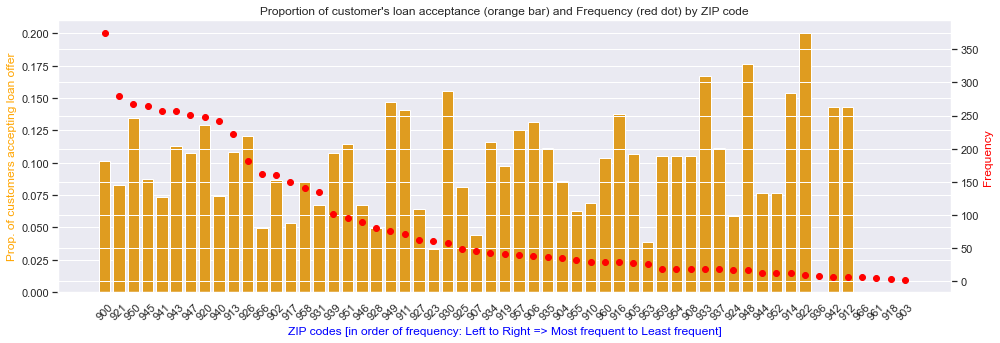

In [16]:
fig, ax1 = plt.subplots(figsize = (16,5))
ax2 = ax1.twinx()

_ = sns.barplot(x=customer['ZIP'], y=customer['Personal Loan'], ci=None, order=z['ZIP'], color='orange', ax=ax1)\
.set_title("Proportion of customer's loan acceptance (orange bar) and Frequency (red dot) by ZIP code")
_ = ax1.set_xlabel('ZIP codes [in order of frequency: Left to Right => Most frequent to Least frequent]', color='blue')
_ = ax1.set_ylabel('Prop. of customers accepting loan offer', color='orange')
loc, labels = plt.xticks()
_ = ax1.set_xticklabels(labels, rotation=45)

_ = ax2.plot(z['ZIP'], z['Frequency'], 'o', color="red")
_ = ax2.set_ylabel('Frequency', color='red')

print("Looking at the plot, there is no 'clear' evidence that ZIP code may matter for prediction of customer's acceptance of personal loan.")

#plt.figure(figsize = (16,5))
#_ = sns.barplot(x=customer['ZIP'], y=customer['Personal Loan'], ci=None, order=z['ZIP'])\
#.set_title("Proportion of customer's loan acceptance by ZIP code")
#_ = plt.xlabel('ZIP codes in order of frequency (Left to Right => Most frequent to Least frequent)')
#_ = plt.ylabel('Prop. of customers accepting loan offer')
#_ = plt.xticks(rotation=45)

In [17]:
# Apply one-hot-encoding to ZIP code variable
# Note: I applied OH encoding across the full dataset irrespective of train and test data
# since ZIP categories/classes are objectively pre-determined;
# thus OH encode-learning on train and applying the same on test data would yield the same result

c = [c for c in customer.columns if 'ZIP_' in c]
customer.drop(columns=c, axis=1, inplace=True)
for i in zHighFreq:
    customer['ZIP_'+i] = np.where(customer['ZIP'].astype(str)==i, 1, 0)

# Rest of the cases where ZIP Code is 'rare'
c = [c for c in customer.columns if 'ZIP_' in c]
customer['ZIP_Others'] = 1 - customer[c].sum(axis=1)

In [18]:
# Apply frequency encoding to ZIP code variable
# zipFreqMap = (customer['ZIP'].value_counts() / len(customer)).to_dict()
# customer['ZIP_Freq_Enc'] = customer['ZIP'].map(zipFreqMap)

### Partition data into Training and Test sets, Build model and evaluate performance

In [19]:
# Prepare reponse and predictor datasets
y = customer['Personal Loan']
X = customer.drop(columns = ['Personal Loan', 'ZIP Code', 'ZIP'], axis=1)


Logistic Regression model scores (averaged based on 20 iterated random train/test splits):
Training set accuracy: 0.9511
Test set accuracy: 0.9511

Classification Metrics (Logistic regression):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.87      0.54      0.66       149

    accuracy                           0.95      1500
   macro avg       0.91      0.76      0.82      1500
weighted avg       0.94      0.95      0.94      1500

ROC AUC score: 0.9524


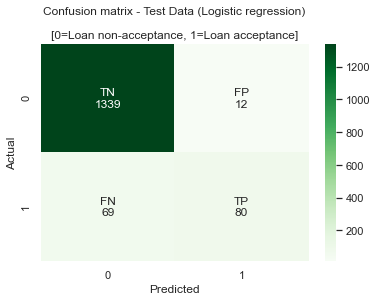

In [20]:
# Logistic Regression
# -------------------
# since the model performance indeed depends on the selection of train and test data
# and there is an element of randomness in selection of train and test data
# I would perform train-test random splits 20 times
# and take average of accuracy scores over 20 iterations as an estimated model scores

# As found earlier, variable ZIP code may not a good predictor and, moreover, it increases the dimension of feature space
# I tried including ZIP code into the model but that doesn't help increase test accuracy and hence drop ZIP code variable 

# prepare transformer object
sc = MinMaxScaler()

trainAccu = []
testAccu = []

c = [c for c in X.columns if 'ZIP_' in c]

for i in range(20):
    # Split dataset into train and test sets (in 70:30 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=i)
    
    # apply standardization only to numerical attributes
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    
    # Logistic Regression fitting
    lr = LogisticRegression()
    lr.fit(scaledX_train, y_train)
    
    # store the train and test accuracy scores into lists trainAccu and testAccu respectively
    trainAccu.append(lr.score(scaledX_train, y_train))
    testAccu.append(lr.score(scaledX_test, y_test))

print('\nLogistic Regression model scores (averaged based on 20 iterated random train/test splits):')
print('Training set accuracy:', np.mean(trainAccu).round(4))
print('Test set accuracy:', np.mean(testAccu).round(4))

#---------------------------------------------------
# store a model for a fixed 'random_state'
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(scaledX_train, y_train)

y_pred_prob = lr.predict_proba(scaledX_test)[:,1]

predicted_lr = lr.predict(scaledX_test)
cm_lr = confusion_matrix(y_test, predicted_lr)
lbl_lr = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_lr.flatten())]

_ = sns.heatmap(cm_lr, annot=np.asarray(lbl_lr).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (Logistic regression)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('\nClassification Metrics (Logistic regression):')
print(classification_report(y_test, predicted_lr))

print('ROC AUC score:', roc_auc_score(y_test, y_pred_prob).round(4))

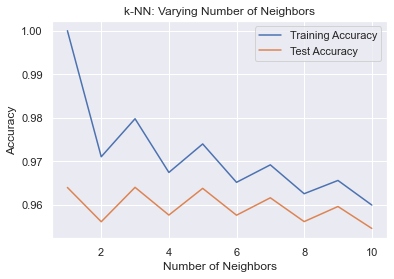

k-NN classification scores (averaged based on 20 iterated random train/test splits):
Best performance found with 5 neighbors (in terms of highest test accuracy)
Training set accuracy with 5 neighbors: 0.974
Test set accuracy with 5 neighbors: 0.9638

Predicted probability of first 10 customers' acceptance of personal loan in the test set (based on k-NN):
[0.4 0.  0.  0.  0.  0.  0.  0.  0.6 0.2]


Classification Metrics (k-NN):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.95      0.64      0.77       149

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



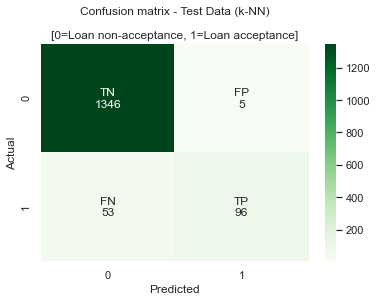

In [21]:
# K-Nearest Neighbor
# -------------------
# since the model performance really depends on the selection of train and test data
# and there is an element of randomness in selection of train and test data
# I would perform train-test random splits 20 times
# and take average of accuracy scores over 20 iterations as an estimated model performance
# In addition, I would repeat above task for different numbers (10) of neighbors to select the best number of neighbors

# As found earlier, Variable ZIP code may not a good predictor and, moreover, it increases the dimension of feature space 
# Nearest neighbor classifier may not work well in the presence of high-dimensional feature space
# Also, from business perspestive, I think ZIP code may not be a good predictor for customer's loan acceptance
# So we drop ZIP code variable

# Variables to apply standardization to
numVars = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']

# prepare transformer object based on column type
ct = ColumnTransformer([('numScaled', StandardScaler(), numVars)], remainder='passthrough')

neighbors = np.arange(1, 11)
trainAccuN = np.empty(len(neighbors))
testAccuN = np.empty(len(neighbors))

c = [c for c in X.columns if 'ZIP_' in c]

# loop over different values of neighbors
for i, k in enumerate(neighbors):
    trainAccu = []
    testAccu = []
    
    for j in range(20):
        # Split dataset into train and test sets (in 70:30 ratio)
        X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=j)

        # apply standardization only to numerical attributes
        scaledX_train = ct.fit_transform(X_train)
        scaledX_test = ct.transform(X_test)

        # k-NN fitting with Euclidean distance (Minkowsi distance with p = 2)
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(scaledX_train, y_train)

        # store the train and test accuracy scores into lists trainAccu and testAccu respectively
        trainAccu.append(knn.score(scaledX_train, y_train))
        testAccu.append(knn.score(scaledX_test, y_test))
    
    # store average train and test accuracy for k neighbors
    trainAccuN[i] = np.mean(trainAccu)
    testAccuN[i] = np.mean(testAccu)

# Generate plot of mean accuracies for different neighbors
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, trainAccuN, label = 'Training Accuracy')
plt.plot(neighbors, testAccuN, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print('k-NN classification scores (averaged based on 20 iterated random train/test splits):')
print('Best performance found with 5 neighbors (in terms of highest test accuracy)')
print('Training set accuracy with 5 neighbors:', trainAccuN[4].round(4))
print('Test set accuracy with 5 neighbors:', testAccuN[4].round(4))

#---------------------------------------------------
# store a model for fixed 'random_state'
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)
scaledX_train = ct.fit_transform(X_train)
scaledX_test = ct.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(scaledX_train, y_train)

print("\nPredicted probability of first 10 customers' acceptance of personal loan in the test set (based on k-NN):")
print(knn.predict_proba(scaledX_test)[0:10,1])
print('\n')

predicted_knn = knn.predict(scaledX_test)
cm_knn = confusion_matrix(y_test, predicted_knn)
lbl_knn = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_knn.flatten())]
_ = sns.heatmap(cm_knn, annot=np.asarray(lbl_knn).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (k-NN)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('Classification Metrics (k-NN):')
print(classification_report(y_test, predicted_knn))


Naive Bayes classification scores (averaged based on 20 iterated random train/test splits):
Training set accuracy: 0.8844
Test set accuracy: 0.8842

Predicted probability of first 10 customers' acceptance of personal loan in the test set (based on Naive Bayes):
[4.48307843e-03 5.05573908e-05 9.44761821e-06 2.93318805e-02
 2.29761644e-03 6.69242056e-06 8.83486360e-05 1.20372499e-02
 9.99828038e-01 2.32380846e-02]


Classification Metrics (Naive Bayes):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



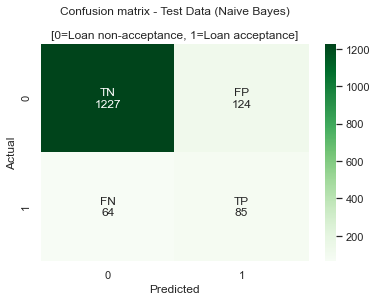

In [22]:
# Naive Bayes
# -----------
# since the model performance really depends on the selection of train and test data
# and there is an element of randomness in selection of train and test data
# I would perform train-test random splits 20 times
# and take average of accuracy scores over 20 iterations as an estimated model performance

# As found earlier, variable ZIP code may not a good predictor and, moreover, it increases the dimension of feature space 
# So we drop ZIP code variable

# Naive Bayes doesn't indeed depend on scaling of variables as it doesn't involve distance calculation;
# rather it is based on prior determined from the data

trainAccu = []
testAccu = []

# loop over different values of neighbors
for i in range(20):
    # Split dataset into train and test sets (in 70:30 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=i)

    # Naive Bayes fitting
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # store the train and test accuracy scores
    trainAccu.append(gnb.score(X_train, y_train))
    testAccu.append(gnb.score(X_test, y_test))

print('\nNaive Bayes classification scores (averaged based on 20 iterated random train/test splits):')
print('Training set accuracy:', np.mean(trainAccu).round(4))
print('Test set accuracy:', np.mean(testAccu).round(4))

#---------------------------------------------------
# store a model for fixed 'random_state'
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("\nPredicted probability of first 10 customers' acceptance of personal loan in the test set (based on Naive Bayes):")
print(gnb.predict_proba(X_test)[0:10,1])
print('\n')

predicted_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, predicted_gnb)
lbl_gnb = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_gnb.flatten())]
_ = sns.heatmap(cm_gnb, annot=np.asarray(lbl_gnb).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (Naive Bayes)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('Classification Metrics (Naive Bayes):')
print(classification_report(y_test, predicted_gnb))

### Applying over-sampling ADASYN technique for imbalanced dataset


Training accuracy (Logistic regression, ADASYN): 0.8327
Test accuracy (Logistic regression, ADASYN): 0.8193

Classification Metrics (Logistic regression, ADASYN):
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1351
           1       0.35      0.95      0.51       149

    accuracy                           0.82      1500
   macro avg       0.67      0.88      0.70      1500
weighted avg       0.93      0.82      0.85      1500



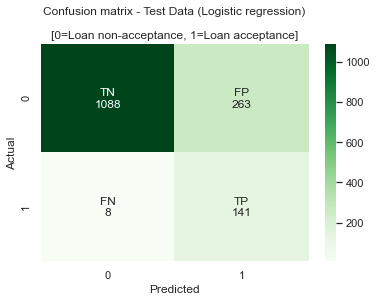

In [23]:
# Given the imbalanced dataset with majority of negative examples in it (10:1 in favor of negative examples), 
# the model will tend to more accurately predict the negative exmaples correctly
# From business viewpoint, bank needs to accurately detect more positive examples correctly
# Oversampling using ADASYN technique is a good option to oversample the minority positive cases
# I tried to see if recall for positive cases in the test sample could be improved using ADASYN

# Logistic Regression (with ADASYN over-sampling)
# -----------------------------------------------
from imblearn.over_sampling import ADASYN
os = ADASYN(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)

# Looking at my earlier EDA, Income, Education, Family, CD Account were found to be potentially important predictors 
X_train, X_test, y_train, y_test = train_test_split(X[['Income', 'Education', 'Family', 'CD Account']], y, test_size=0.3, random_state=1)
os_X_train, os_y_train = os.fit_sample(X_train, y_train)

# Variables to apply standardization to
numVars = ['Income', 'Family']

# prepare transformer object based on column type
ct = ColumnTransformer([('numScaled', StandardScaler(), numVars)], remainder='passthrough')

scaledX_train = ct.fit_transform(os_X_train)
scaledX_test = ct.transform(X_test)
lr = LogisticRegression()
lr.fit(scaledX_train, os_y_train)
print('\nTraining accuracy (Logistic regression, ADASYN):', lr.score(scaledX_train, os_y_train).round(4))
print('Test accuracy (Logistic regression, ADASYN):', lr.score(scaledX_test, y_test).round(4))

predicted_lr = lr.predict(scaledX_test)
cm_lr = confusion_matrix(y_test, predicted_lr)
lbl_lr = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_lr.flatten())]
_ = sns.heatmap(cm_lr, annot=np.asarray(lbl_lr).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (Logistic regression)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('\nClassification Metrics (Logistic regression, ADASYN):')
print(classification_report(y_test, predicted_lr))


Training accuracy (k-NN, ADASYN): 0.9476
Test accuracy (k-NN, ADASYN): 0.9113

Classification Metrics (k-NN):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1351
           1       0.53      0.88      0.66       149

    accuracy                           0.91      1500
   macro avg       0.76      0.90      0.81      1500
weighted avg       0.94      0.91      0.92      1500



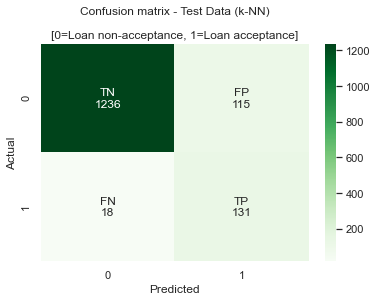

In [24]:
# k-NN (with ADASYN over-sampling)
# ---------------------------------
from imblearn.over_sampling import ADASYN
os = ADASYN(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)

# Looking at my earlier EDA, Income, Education, Family, CD Account were found to be potentially important predictors 
X_train, X_test, y_train, y_test = train_test_split(X[['Income', 'Education', 'Family', 'CD Account']], y, test_size=0.3, random_state=1)
os_X_train, os_y_train = os.fit_sample(X_train, y_train)

# Variables to apply standardization to
#numVars = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']
numVars = ['Income', 'Family']

# prepare transformer object based on column type
ct = ColumnTransformer([('numScaled', StandardScaler(), numVars)], remainder='passthrough')

scaledX_train = ct.fit_transform(os_X_train)
scaledX_test = ct.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(scaledX_train, os_y_train)
print('\nTraining accuracy (k-NN, ADASYN):', knn.score(scaledX_train, os_y_train).round(4))
print('Test accuracy (k-NN, ADASYN):', knn.score(scaledX_test, y_test).round(4))

predicted_knn = knn.predict(scaledX_test)
cm_knn = confusion_matrix(y_test, predicted_knn)
lbl_knn = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_knn.flatten())]
_ = sns.heatmap(cm_knn, annot=np.asarray(lbl_knn).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (k-NN)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('\nClassification Metrics (k-NN):')
print(classification_report(y_test, predicted_knn))


Training accuracy (Naive Bayes, ADASYN): 0.7651
Test accuracy (Naive Bayes, ADASYN): 0.8193
Classification Metrics (Naive Bayes):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1351
           1       0.34      0.86      0.49       149

    accuracy                           0.82      1500
   macro avg       0.66      0.84      0.69      1500
weighted avg       0.92      0.82      0.85      1500



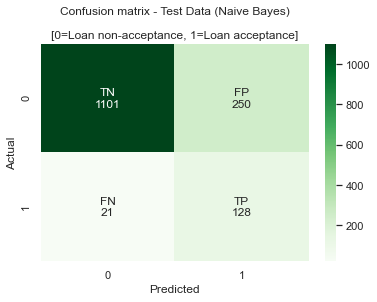

In [25]:
# Naive Bayes (with ADASYN over-sampling)
# ----------------------------------------
from imblearn.over_sampling import ADASYN
os = ADASYN(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=c, axis=1), y, test_size=0.3, random_state=1)

# Looking at my earlier EDA, Income, Education, Family, CD Account were found to be potentially important predictors 
X_train, X_test, y_train, y_test = train_test_split(X[['Income', 'Education', 'Family', 'CD Account']], y, test_size=0.3, random_state=1)
os_X_train, os_y_train = os.fit_sample(X_train, y_train)

gnb = GaussianNB()
gnb.fit(os_X_train, os_y_train)
print('\nTraining accuracy (Naive Bayes, ADASYN):', gnb.score(os_X_train, os_y_train).round(4))
print('Test accuracy (Naive Bayes, ADASYN):', gnb.score(X_test, y_test).round(4))

predicted_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, predicted_gnb)
lbl_gnb = [f"{i}\n{j}" for i, j in zip(['TN', 'FP', 'FN', 'TP'], cm_gnb.flatten())]
_ = sns.heatmap(cm_gnb, annot=np.asarray(lbl_gnb).reshape(2,2), fmt='', cmap='Greens').\
 set_title('Confusion matrix - Test Data (Naive Bayes)\n\n[0=Loan non-acceptance, 1=Loan acceptance]')
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

print('Classification Metrics (Naive Bayes):')
print(classification_report(y_test, predicted_gnb))

### Comparison of models: Logistic regression, k-NN, Naive Bayes

In [26]:
# Comparison of Logistic Regression, k-NN, Naive Bayes models:

print("\nOur goal in this study is to correctly detect the customers actually accepted personal loan.\
 So it is important for us to try minimize misclassification rate for the cases where customers actually accepted loan\
 but model predicted otherwise. Thus we must look at increasing the recall of customer's loan acceptance.")

print('\nBased on models built on imbalanced training set, in terms of test accuracy:')
print('In terms of test accuracy, k-NN with 5 neighbors performed best, while the next best was Logistic regression,\
 and the worst was Naive Bayes')
print('1) k-NN with 5 neighbors: Recall for loan acceptance = 64%, Precision for loan acceptance = 95%, overall accuracy = 96%')
print('2) Logistic regression: Recall for loan acceptance = 54%, Precision for loan acceptance = 87%, overall accuracy = 95%')
print('3) Naive Bayes: Recall for loan acceptance = 57%, Precision for loan acceptance = 41%, overall accuracy = 87%')
print('\nNotably, the accuracy was good across models in general - this is an obvious phenomenon for an imbalanced dataset.\
 Thus, important measure of model performance should be based on recall of positive cases, i.e., for customers accepting loan offer.')
print("\nk-NN being a non-parametric supervised classification technique, this method doesn't depend on any parametric assumptions\
 and can capture potential non-linear relationship in data. We used standardization to bring data into the same scale helping\
 data to be well-behaved for k-NN. So k-NN seems to be the best model for classification.")
print("Logistic regression and Naive Bayes assume there should not be high multicollinearity among the predictors. The dataset seems to have a bit\
 of multicollinearity, for e.g. Income and Credit Card balance. Moreover, the dataset is class-imbalanced.")

print("\nIn order to rectify the class-imbalanced problem, I looked at ADASYN over-sampling technique that seem to have\
 solved the low recall problem for positive classes.")

print("\nWe may also want to check AUC from ROC curve and may change the threshold to adjust the predicted classes as an alternative way to look at this problem.")


Our goal in this study is to correctly detect the customers actually accepted personal loan. So it is important for us to try minimize misclassification rate for the cases where customers actually accepted loan but model predicted otherwise. Thus we must look at increasing the recall of customer's loan acceptance.

Based on models built on imbalanced training set, in terms of test accuracy:
In terms of test accuracy, k-NN with 5 neighbors performed best, while the next best was Logistic regression, and the worst was Naive Bayes
1) k-NN with 5 neighbors: Recall for loan acceptance = 64%, Precision for loan acceptance = 95%, overall accuracy = 96%
2) Logistic regression: Recall for loan acceptance = 54%, Precision for loan acceptance = 87%, overall accuracy = 95%
3) Naive Bayes: Recall for loan acceptance = 57%, Precision for loan acceptance = 41%, overall accuracy = 87%

Notably, the accuracy was good across models in general - this is an obvious phenomenon for an imbalanced dataset. T

## <center><font color='green'>*******End of Project Solution*******</font></center>